In [4]:
%pip install tqdm


  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------------- ------------------------ 20.5/57.6 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 607.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   --------------- ------------------------ 30.7/78.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 78.3/78.3 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as py
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
import networkx as nx
from IPython.display import IFrame
from pyvis import network as net
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import kmodes 
from kmodes.kmodes import KModes

In [3]:
df = pd.read_csv('anes_pilot_2022_csv_20221214.csv', na_values=[-7])

C:\Users\nates\AppData\Local\Temp\ipykernel_22784\396914132.py:1: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('anes_pilot_2022_csv_20221214.csv', na_values=[-7])


In [4]:
df = df.replace('__NA__',pd.NA) 
df = df.replace(r'^\s*$',pd.NA, regex=True)
df = df.drop(columns=df.columns[df.eq(-1).mean()>0.51])
df = df[df.columns.drop(list(df.filter(regex='timing')))]

In [5]:
demo_df = df[['employ', 'inputstate','birthyr_dropdown','gender','educ','marstat','child18', 'pid3','pid7','presvote16post','presvote20post','votereg','ideo5','religpew','newsint','immigrant','urbanicity2','ownhome','genhealth','healthinsur_srg_99']]

In [6]:
demo_df = demo_df.dropna()
data_scaled = normalize(demo_df)
data_scaled = pd.DataFrame(data_scaled, columns=demo_df.columns)
data_scaled.head()

NameError: name 'normalize' is not defined

In [8]:
current_year = datetime.now().year
demo_df['age'] = current_year - demo_df['birthyr_dropdown']
grouped = demo_df.groupby(['age', 'gender']).size().reset_index(name='count')

In [ ]:
G = nx.from_pandas_edgelist(demo_df, source='gender', target='age', create_using=nx.DiGraph)
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40)
plt.show()
labels = {}
for node in G.nodes():
    if isinstance(node, int):
        labels[node] = str(node)
    else:
        labels[node] = f'{node[0]}_{node[1]}'
net1 = net.Network('1500px', '1500px', font_color="gray",notebook=True,cdn_resources='remote')
net1.from_nx(G)
for node in net1.nodes:
    node['label'] = labels[node['id']]
net1.show_buttons(filter_=['physics'])
net1.barnes_hut()
net1.force_atlas_2based()
net1.toggle_physics(True)
net1.show("my_network.html", notebook=True)

In [18]:
demo_df2 = demo_df.copy()

demo_df2['pid3'] = py.where(demo_df2['pid3']==1, 'Democratic',
              py.where(demo_df2['pid3']==2, 'Republican',
              py.where(demo_df2['pid3']==3, 'Independent',
              py.where(demo_df2['pid3']==4, 'Other',
              py.where(demo_df2['pid3']==5, 'Not Sure', 
                       'inap')))))

demo_df2['pid7'] = py.where(demo_df2['pid7']==1, 'Strong Democrat',
              py.where(demo_df2['pid7']==2, 'Not very strong Democrat',
              py.where(demo_df2['pid7']==3, 'Lean Democrat',
              py.where(demo_df2['pid7']==4, 'Independent',
              py.where(demo_df2['pid7']==5, 'Lean Republican',
              py.where(demo_df2['pid7']==6, 'Not very strong Republican',
              py.where(demo_df2['pid7']==7, 'Strong Republican',
              py.where(demo_df2['pid7']==8, 'Not sure', 
                       'inap'))))))))

demo_df2['educ'] = py.where(demo_df2['educ']==1, 'No HS',
              py.where(demo_df2['educ']==2, 'High school graduate',
              py.where(demo_df2['educ']==3, 'Some college',
              py.where(demo_df2['educ']==4, '2_year',
              py.where(demo_df2['educ']==5, '4_year',
              py.where(demo_df2['educ']==6, 'Post_grad', 
                       'inap'))))))

demo_df2['marstat'] = py.where(demo_df2['marstat']==1, 'Married',
              py.where(demo_df2['marstat']==2, 'Separated',
              py.where(demo_df2['marstat']==3, 'Divorced',
              py.where(demo_df2['marstat']==4, 'Widowed',
              py.where(demo_df2['marstat']==5, 'Never married',
              py.where(demo_df2['marstat']==6, 'Domestic_civil partnership', 
                       'inap'))))))

demo_df2['votereg'] = py.where(demo_df2['votereg']==1, 'Yes',
              py.where(demo_df2['votereg']==2, 'Republican',
              py.where(demo_df2['votereg']==3, 'Independent', 
                       'inap')))
demo_df2['gender'] = py.where(demo_df2['gender']==1, 'Male',
              py.where(demo_df2['gender']==2, 'Female', 
                       'inap'))

demo_df2['employ'] = py.where(demo_df2['employ']==1, 'Full_time',
              py.where(demo_df2['employ']==2, 'Part_time',
              py.where(demo_df2['employ']==3, 'Temporarily laid off',
              py.where(demo_df2['employ']==4, 'Unemployed',
              py.where(demo_df2['employ']==5, 'Retired',
              py.where(demo_df2['employ']==6, 'Permanently disabled',
              py.where(demo_df2['employ']==7, 'Homemaker', 
                       'inap')))))))

demo_df2['child18'] = py.where(demo_df2['child18']==1, 'yes',
              py.where(demo_df2['child18']==2, 'No', 
                       'inap'))

demo_df2['presvote16post'] = py.where(demo_df2['presvote16post']==1, 'Hilary Clinton',
              py.where(demo_df2['presvote16post']==2, 'Donald Trump',
              py.where(demo_df2['presvote16post']==3, 'Gary Johnson',
              py.where(demo_df2['presvote16post']==4, 'Jill Stein',
              py.where(demo_df2['presvote16post']==5, 'Evan McMullin',
              py.where(demo_df2['presvote16post']==6, 'Other',
              py.where(demo_df2['presvote16post']==7, 'Did not vote',
                       'inap')))))))

demo_df2['presvote20post'] = py.where(demo_df2['presvote20post']==1, 'Joe Biden',
              py.where(demo_df2['presvote20post']==2, 'Donald Trump',
              py.where(demo_df2['presvote20post']==3, 'Jo Jorgensen',
              py.where(demo_df2['presvote20post']==4, 'Howie Hawkins',
              py.where(demo_df2['presvote20post']==5, 'Other',
              py.where(demo_df2['presvote20post']==6, 'Did not vote',
                       'inap'))))))

demo_df2['newsint'] = py.where(demo_df2['newsint']==1, 'Most of the time',
              py.where(demo_df2['newsint']==2, 'Some of the time',
              py.where(demo_df2['newsint']==3, 'Only now and then',
              py.where(demo_df2['newsint']==4, 'Hardly at all',
              py.where(demo_df2['newsint']==7, 'Dont know',
                       'inap')))))

demo_df2['immigrant'] = py.where(demo_df2['immigrant']==1, 'Immigrant citizen',
              py.where(demo_df2['immigrant']==3, 'First generation',
              py.where(demo_df2['immigrant']==4, 'Second generation',
              py.where(demo_df2['immigrant']==5, 'Third generation',
                       'inap'))))

demo_df2['urbanicity2'] = py.where(demo_df2['urbanicity2']==1, 'Big city',
              py.where(demo_df2['urbanicity2']==2, 'Smaller city',
              py.where(demo_df2['urbanicity2']==3, 'Suburban area',
              py.where(demo_df2['urbanicity2']==4, 'Small town',
              py.where(demo_df2['urbanicity2']==7, 'Rural area',
                       'inap')))))

demo_df2['ownhome'] = py.where(demo_df2['ownhome']==1, 'Own',
              py.where(demo_df2['ownhome']==2, 'Rent',
              py.where(demo_df2['ownhome']==3, 'Other',
                       'inap')))

demo_df2['genhealth'] = py.where(demo_df2['genhealth']==1, 'Excellent',
              py.where(demo_df2['genhealth']==2, 'Very good',
              py.where(demo_df2['genhealth']==3, 'Good',
              py.where(demo_df2['genhealth']==4, 'Fair',
              py.where(demo_df2['genhealth']==5, 'Poor',
                       'inap')))))

demo_df2['healthinsur_srg_99'] = py.where(demo_df2['healthinsur_srg_99']==1, 'Selected',
              py.where(demo_df2['healthinsur_srg_99']==2, 'Not selected', 
                       'inap'))

demo_df2['inputstate'] = py.where(demo_df2['inputstate']==1, 'Alabama',
              py.where(demo_df2['inputstate']==2, 'Alaska',
              py.where(demo_df2['inputstate']==4, 'Arizona',
              py.where(demo_df2['inputstate']==5, 'Arkansas',
              py.where(demo_df2['inputstate']==6, 'California',
              py.where(demo_df2['inputstate']==8, 'Colorado',
              py.where(demo_df2['inputstate']==9, 'Connecticut',
              py.where(demo_df2['inputstate']==10, 'Delaware',
              py.where(demo_df2['inputstate']==11, 'District of Columbia',
              py.where(demo_df2['inputstate']==12, 'Florida',
              py.where(demo_df2['inputstate']==13, 'Georgia',
              py.where(demo_df2['inputstate']==15, 'Hawaii',
              py.where(demo_df2['inputstate']==16, 'Idaho',
              py.where(demo_df2['inputstate']==17, 'Illinois',
              py.where(demo_df2['inputstate']==18, 'Indiana',
              py.where(demo_df2['inputstate']==19, 'Iowa',
              py.where(demo_df2['inputstate']==20, 'Kansas',
              py.where(demo_df2['inputstate']==21, 'Kentucky',
              py.where(demo_df2['inputstate']==22, 'Louisiana',
              py.where(demo_df2['inputstate']==23, 'Maine',
              py.where(demo_df2['inputstate']==24, 'Maryland',
              py.where(demo_df2['inputstate']==25, 'Massachusetts',
              py.where(demo_df2['inputstate']==26, 'Michigan',
              py.where(demo_df2['inputstate']==27, 'Minnesota',
              py.where(demo_df2['inputstate']==28, 'Mississippi',
              py.where(demo_df2['inputstate']==29, 'Missouri',
              py.where(demo_df2['inputstate']==30, 'Montana',
              py.where(demo_df2['inputstate']==31, 'Nebraska',
              py.where(demo_df2['inputstate']==32, 'Nevada',
              py.where(demo_df2['inputstate']==33, 'New Hampshire',
              py.where(demo_df2['inputstate']==34, 'New Jersey',
              py.where(demo_df2['inputstate']==35, 'New Mexico',
              py.where(demo_df2['inputstate']==36, 'New York',
              py.where(demo_df2['inputstate']==37, 'North Carolina',
              py.where(demo_df2['inputstate']==38, 'North Dakota',
              py.where(demo_df2['inputstate']==39, 'Ohio',
              py.where(demo_df2['inputstate']==40, 'Oklahoma',
              py.where(demo_df2['inputstate']==41, 'Oregon',
              py.where(demo_df2['inputstate']==42, 'Pennsylvania',
              py.where(demo_df2['inputstate']==44, 'Rhode Island',
              py.where(demo_df2['inputstate']==45, 'South Carolina',
              py.where(demo_df2['inputstate']==46, 'South Dakota',
              py.where(demo_df2['inputstate']==47, 'Tennessee',
              py.where(demo_df2['inputstate']==48, 'Texas',
              py.where(demo_df2['inputstate']==49, 'Utah',
              py.where(demo_df2['inputstate']==50, 'Vermont',
              py.where(demo_df2['inputstate']==51, 'Virginia',
              py.where(demo_df2['inputstate']==53, 'Washington',
              py.where(demo_df2['inputstate']==54, 'West Virginia',
              py.where(demo_df2['inputstate']==55, 'Wisconsin',
              py.where(demo_df2['inputstate']==56, 'Wyoming',
              'inap')))))))))))))))))))))))))))))))))))))))))))))))))))

demo_df2['ideo5'] = py.where(demo_df2['ideo5']==1, 'Very liberal',
              py.where(demo_df2['ideo5']==2, 'Liberal',
              py.where(demo_df2['ideo5']==3, 'Moderate',
              py.where(demo_df2['ideo5']==4, 'Conservative',
              py.where(demo_df2['ideo5']==5, 'Very Conservative',
              py.where(demo_df2['ideo5']==6, 'Not Sure', 
                       'inap'))))))

demo_df2['religpew'] = py.where(demo_df2['religpew']==1, 'Protestant',
              py.where(demo_df2['religpew']==2, 'Roman Catholic',
              py.where(demo_df2['religpew']==3, 'Mormon',
              py.where(demo_df2['religpew']==4, 'Eastern or Greek Orthodox',
              py.where(demo_df2['religpew']==5, 'Jewish',
              py.where(demo_df2['religpew']==6, 'Muslim',
              py.where(demo_df2['religpew']==7, 'Buddhist',
              py.where(demo_df2['religpew']==8, 'Hindu',
              py.where(demo_df2['religpew']==9, 'Atheist',
              py.where(demo_df2['religpew']==10, 'Agnostic',
              py.where(demo_df2['religpew']==11, 'Nothing in particular',
              py.where(demo_df2['religpew']==12, 'Something else',
                       'inap'))))))))))))



demo_df2 = demo_df2.drop(columns=['birthyr_dropdown','age','healthinsur_srg_99'])
test_df2 = demo_df2[['pid3','pid7','educ','marstat','votereg','gender','employ','child18', 'presvote16post','presvote20post','newsint', 'immigrant']]
df2_dummy = pd.get_dummies(demo_df2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 14653.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 14653.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 14653.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 14653.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 14653.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 14653.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 14653.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration:

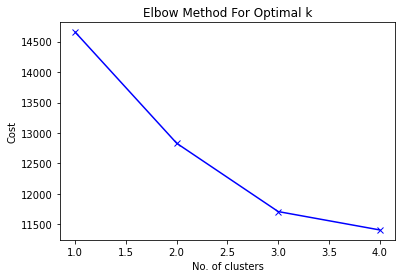

In [9]:
#kmeans clustering code attempt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 10, verbose=1)
    kmode.fit_predict(demo_df2)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()


In [10]:
kmode = KModes(n_clusters=3, init = "random", n_init = 10, verbose=1)
clusters = kmode.fit_predict(demo_df2)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 329, cost: 11755.0
Run 1, iteration: 2/100, moves: 155, cost: 11724.0
Run 1, iteration: 3/100, moves: 0, cost: 11724.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 527, cost: 11984.0
Run 2, iteration: 2/100, moves: 99, cost: 11939.0
Run 2, iteration: 3/100, moves: 81, cost: 11891.0
Run 2, iteration: 4/100, moves: 21, cost: 11891.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 460, cost: 11789.0
Run 3, iteration: 2/100, moves: 69, cost: 11789.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 433, cost: 12523.0
Run 4, iteration: 2/100, moves: 22, cost: 12523.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 389, cost: 118

array([2, 2, 0, ..., 0, 1, 2], dtype=uint16)

In [14]:
demo_df2.insert(0, "Cluster", clusters, True)
demo_df2

NameError: name 'clusters' is not defined

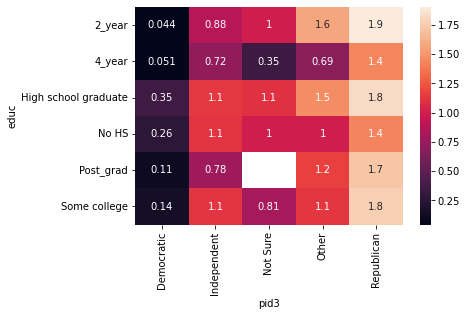

In [12]:
df_heatmap = demo_df2.pivot_table(values='Cluster',index='educ',columns='pid3',aggfunc=py.mean)
sns.heatmap(df_heatmap,annot=True)
plt.show()

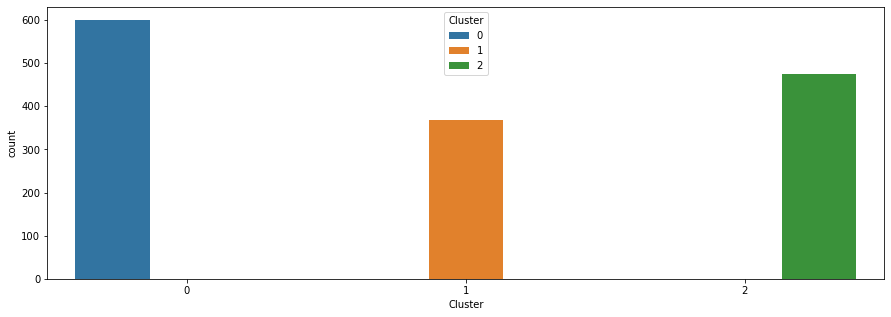

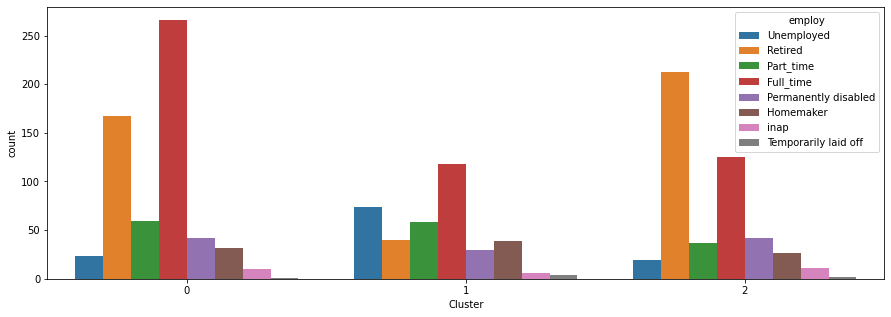

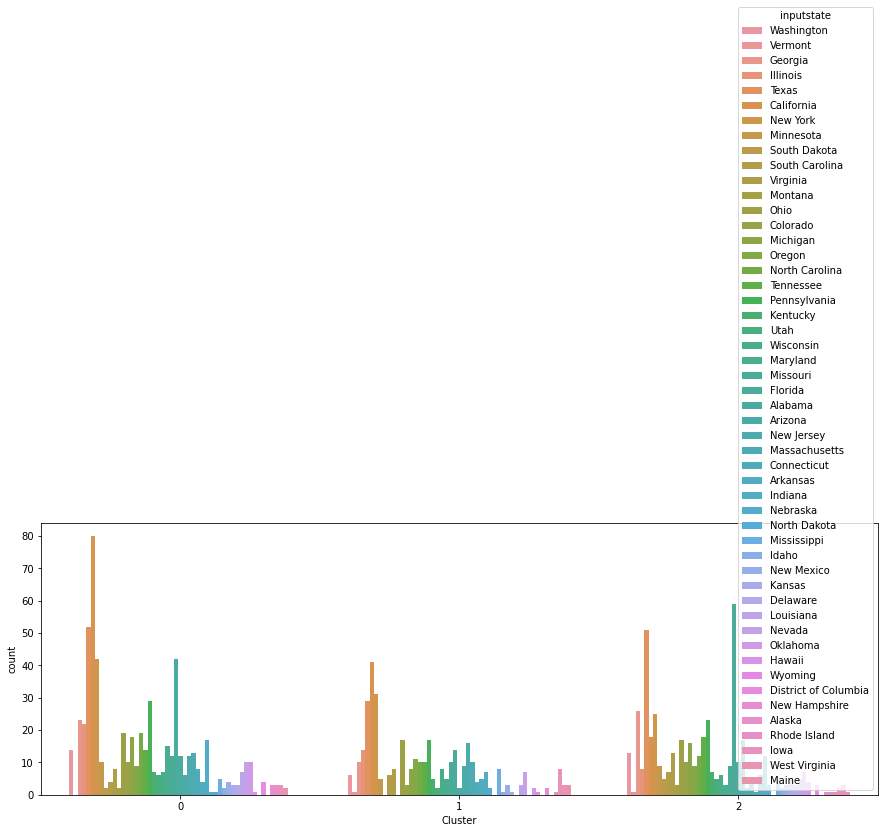

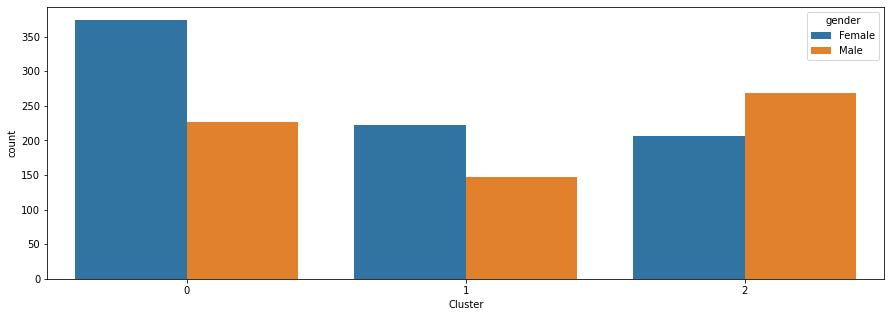

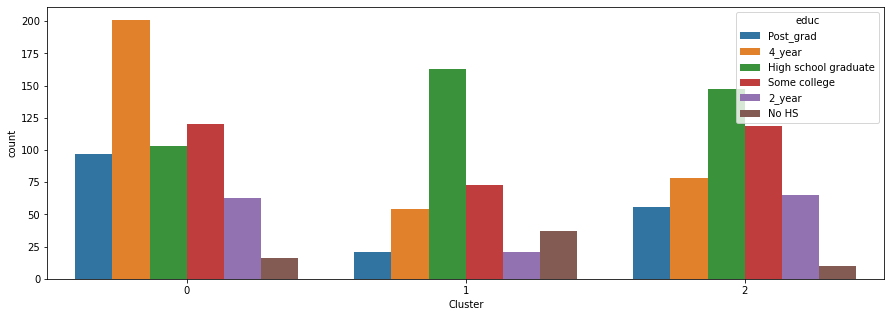

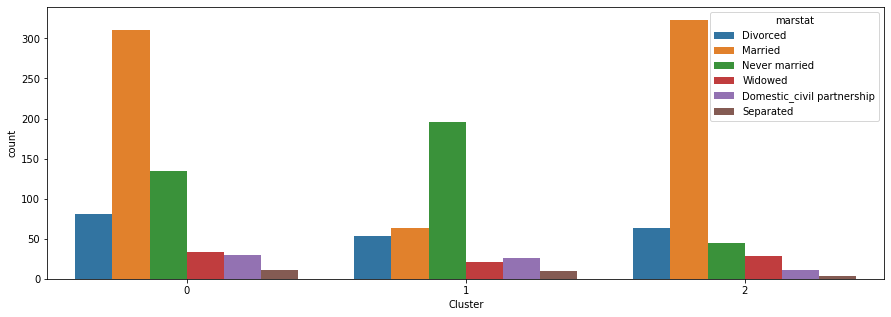

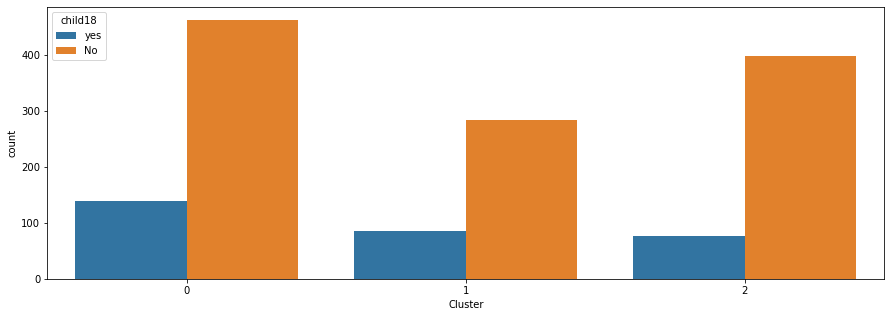

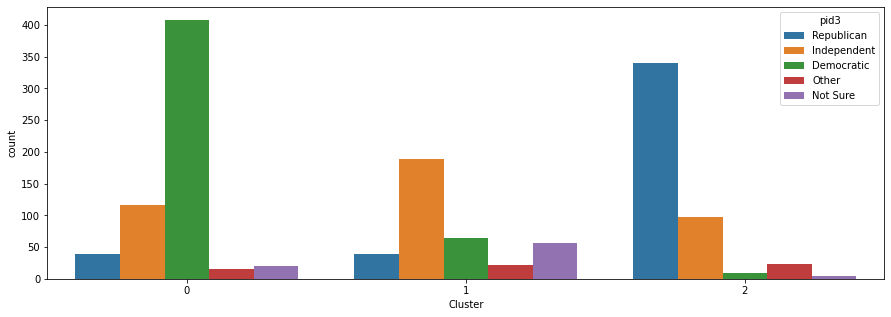

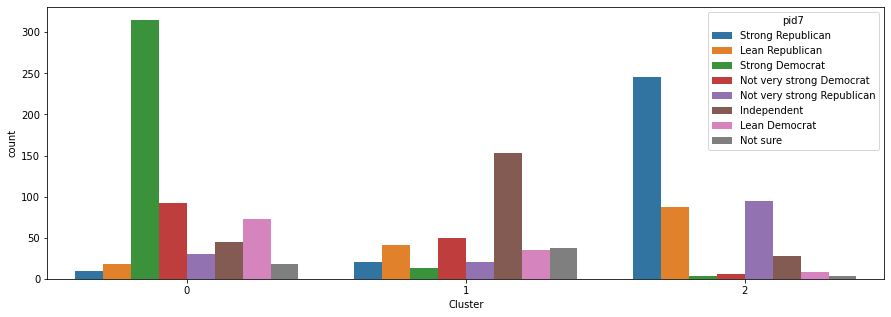

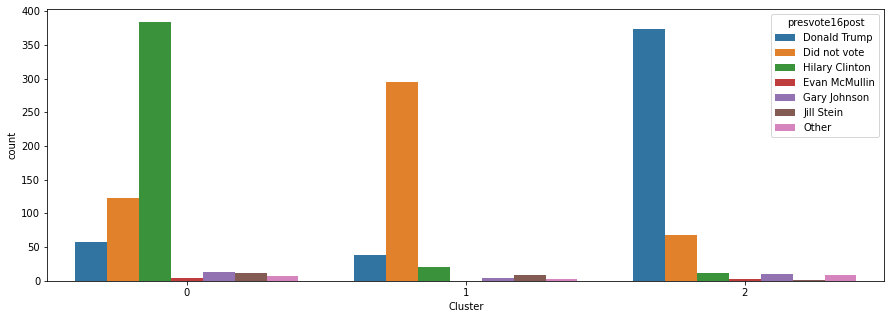

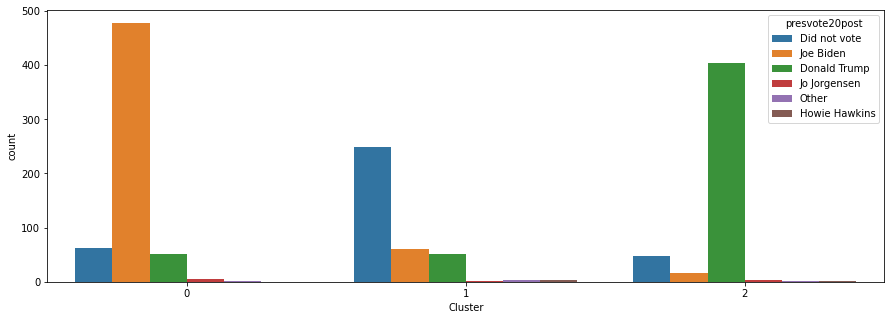

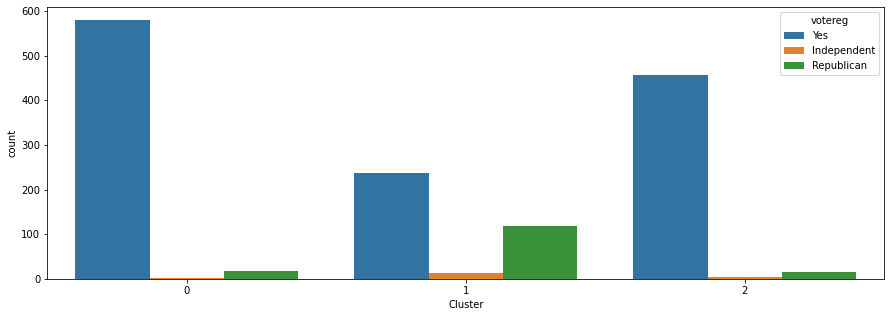

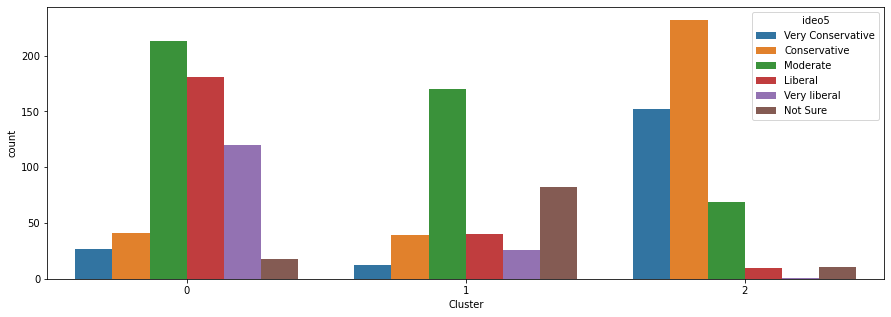

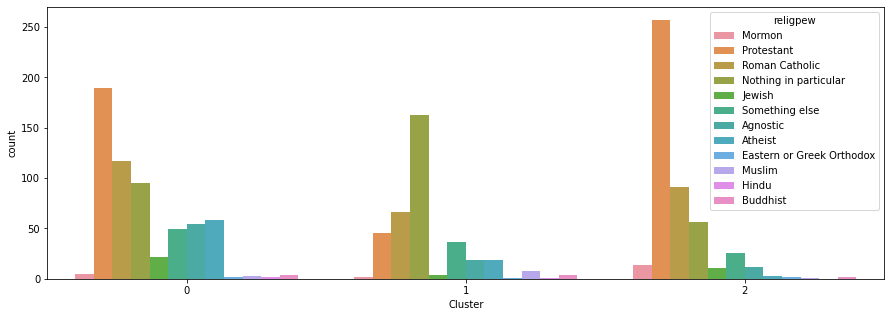

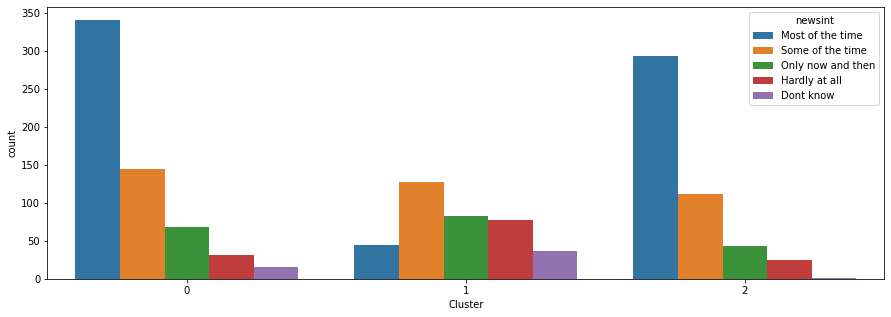

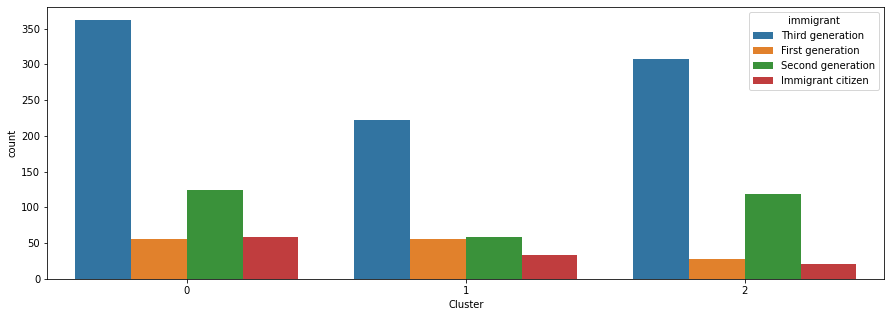

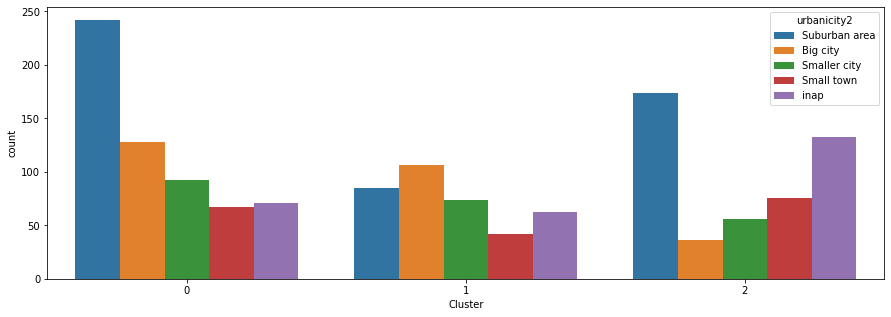

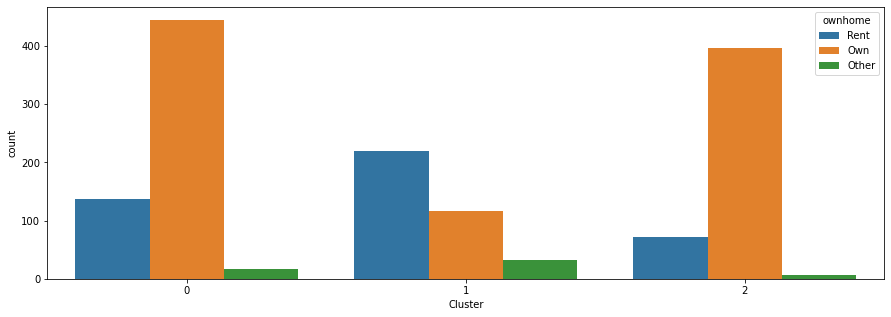

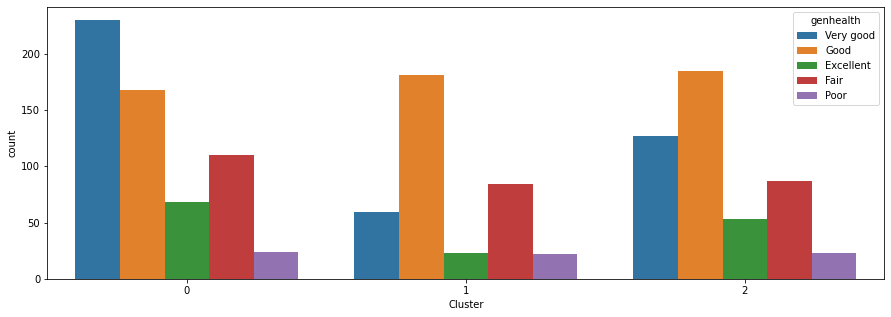

In [13]:
for col in demo_df2:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = demo_df2)
    plt.show()

In [14]:

frq_items = apriori(df2_dummy, min_support = 0.20, use_colnames = True, max_len=None)
  
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

c:\Users\nates\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
78,(pid7_Strong Democrat),(pid3_Democratic),0.229224,0.333102,0.229224,1.000000,3.002079,0.152869,inf,0.865229
445,"(presvote20post_Joe Biden, pid7_Strong Democrat)",(pid3_Democratic),0.206371,0.333102,0.206371,1.000000,3.002079,0.137628,inf,0.840314
451,"(pid7_Strong Democrat, votereg_Yes)",(pid3_Democratic),0.223684,0.333102,0.223684,1.000000,3.002079,0.149174,inf,0.859054
876,"(presvote20post_Joe Biden, votereg_Yes, pid7_S...",(pid3_Democratic),0.204294,0.333102,0.204294,1.000000,3.002079,0.136243,inf,0.838120
527,"(presvote20post_Joe Biden, presvote16post_Hila...",(votereg_Yes),0.266620,0.882271,0.266620,1.000000,1.133438,0.031389,inf,0.160529
...,...,...,...,...,...,...,...,...,...,...
277,(votereg_Yes),"(marstat_Married, presvote16post_Donald Trump)",0.882271,0.205679,0.202909,0.229984,1.118173,0.021444,1.031565,0.897691
536,(votereg_Yes),"(newsint_Most of the time, presvote20post_Dona...",0.882271,0.201524,0.201524,0.228414,1.133438,0.023725,1.034851,1.000000
413,(votereg_Yes),"(genhealth_Very good, child18_No)",0.882271,0.221607,0.201524,0.228414,1.030720,0.006006,1.008823,0.253164
39,(votereg_Yes),(educ_Some college),0.882271,0.216066,0.200831,0.227630,1.053516,0.010202,1.014971,0.431481


In [15]:
frq_items['length'] = frq_items['itemsets'].apply(lambda x: len(x))
frq_items[ (frq_items['length'] ==2)].sort_values(['support'], ascending =[False]).head(15)

,support,itemsets,length
80,0.700139,"(votereg_Yes, child18_No)",2
128,0.612188,"(votereg_Yes, ownhome_Own)",2
126,0.545014,"(votereg_Yes, immigrant_Third generation)",2
87,0.527008,"(ownhome_Own, child18_No)",2
85,0.495152,"(immigrant_Third generation, child18_No)",2
47,0.488227,"(gender_Female, votereg_Yes)",2
124,0.460526,"(newsint_Most of the time, votereg_Yes)",2
66,0.446676,"(marstat_Married, votereg_Yes)",2
43,0.429363,"(gender_Female, child18_No)",2
138,0.412742,"(immigrant_Third generation, ownhome_Own)",2


In [16]:
rules["antecedents"]=rules["antecedents"].astype(str)
rules["consequents"]=rules["consequents"].astype(str)
Basket_Network_Data=rules[~(rules["antecedents"].str.contains(",")) & ~(rules["consequents"].str.contains(","))]

Basket_Network_Data

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
78,frozenset({'pid7_Strong Democrat'}),frozenset({'pid3_Democratic'}),0.229224,0.333102,0.229224,1.000000,3.002079,0.152869,inf,0.865229
111,frozenset({'presvote16post_Hilary Clinton'}),frozenset({'votereg_Yes'}),0.288781,0.882271,0.287396,0.995204,1.128002,0.032613,24.546399,0.159552
115,frozenset({'presvote20post_Donald Trump'}),frozenset({'votereg_Yes'}),0.351801,0.882271,0.347645,0.988189,1.120051,0.037262,9.967682,0.165356
122,frozenset({'presvote20post_Joe Biden'}),frozenset({'votereg_Yes'}),0.384349,0.882271,0.378809,0.985586,1.117100,0.039709,8.167417,0.170267
102,frozenset({'presvote16post_Donald Trump'}),frozenset({'votereg_Yes'}),0.325485,0.882271,0.320637,0.985106,1.116557,0.033471,7.904630,0.154762
...,...,...,...,...,...,...,...,...,...,...
136,frozenset({'votereg_Yes'}),frozenset({'newsint_Some of the time'}),0.882271,0.265928,0.242382,0.274725,1.033082,0.007762,1.012130,0.272000
97,frozenset({'votereg_Yes'}),frozenset({'pid7_Strong Democrat'}),0.882271,0.229224,0.223684,0.253532,1.106044,0.021446,1.032564,0.814387
35,frozenset({'votereg_Yes'}),frozenset({'educ_4_year'}),0.882271,0.230609,0.213296,0.241758,1.048345,0.009836,1.014704,0.391711
39,frozenset({'votereg_Yes'}),frozenset({'educ_Some college'}),0.882271,0.216066,0.200831,0.227630,1.053516,0.010202,1.014971,0.431481


In [18]:
Basket_Network1= net.Network(height="1000px", width="1000px", directed=True, notebook=True,cdn_resources='remote')
Basket_Network1.force_atlas_2based()

Basket_Network_Data_zip=zip(Basket_Network_Data["antecedents"],
                            Basket_Network_Data["consequents"],
                            Basket_Network_Data["antecedent support"],
                            Basket_Network_Data["consequent support"],
                            Basket_Network_Data["confidence"])

for i in Basket_Network_Data_zip:
    FromItem=i[0].replace("frozenset({'","").replace("'})","").replace("',　'",",")
    ToItem=i[1].replace("frozenset({'","").replace("'})","").replace("',　'",",")
    FromWeight=i[2]
    ToWeight=i[3]
    EdgeWeight=i[4]

    Basket_Network1.add_node(n_id=FromItem, shape="dot", value=FromWeight,
                            title=FromItem + "<br>Support: " + str(FromWeight))
    Basket_Network1.add_node(n_id=ToItem, shape="dot", value=ToWeight,
                           title=ToItem + "<br>Support: " + str(ToWeight))
    Basket_Network1.add_edge(source=FromItem, to=ToItem, value=EdgeWeight, arrowStrikethrough=False,
                            title=FromItem + " --> " + ToItem + "<br>Confidence:" + str(EdgeWeight))

In [ ]:
Basket_Network1.set_edge_smooth(smooth_type="dynamic")
Basket_Network1.toggle_hide_edges_on_drag(True)
Basket_Network1.show_buttons(filter_=False)

Basket_Network1.save_graph("Basket_Network1.html")
Basket_Network1.show("Basket_Network1.html", notebook=True)

In [21]:
#ANN test
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold


X = pd.get_dummies(demo_df2.drop(columns=['Cluster']))
Y = demo_df2['Cluster'].astype('category').cat.codes

def create_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(12, input_shape=(input_dim,), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim, activation='softmax'))
    return model

def lr_schedule(epoch):
    lr = 0.001
    if epoch > 100:
        lr *= 0.01
    elif epoch > 50:
        lr *= 0.1
    return lr

tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1)
lr_scheduler = LearningRateScheduler(lr_schedule)

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    model = create_model(X_train.shape[1], len(py.unique(Y)))

    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=10, callbacks=[tensorboard, lr_scheduler])

    scores = model.evaluate(X_test, Y_test)
    accuracy_scores.append(scores[1])

print("Average accuracy: %.2f%% (+/- %.2f%%)" % (py.mean(accuracy_scores) * 100, py.std(accuracy_scores) * 100))

In [ ]:
print(model.summary())

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./logs

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = demo_df2.copy()  

data = pd.get_dummies(data, columns=data.columns.drop('presvote20post'), drop_first=True)

data.dropna(inplace=True)

X = data.drop('presvote20post', axis=1)
y = data['presvote20post']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [27]:

class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

weighted_avg_dict = {
    'precision': class_report['weighted avg']['precision'],
    'recall': class_report['weighted avg']['recall'],
    'f1-score': class_report['weighted avg']['f1-score'],
    'support': class_report['weighted avg']['support']
}

class_report['summary'] = weighted_avg_dict

print("Custom Classification Report:")
print(pd.DataFrame(class_report).transpose())



Custom Classification Report:
               precision    recall  f1-score     support
Did not vote    0.710145  0.671233  0.690141   73.000000
Donald Trump    0.848485  0.823529  0.835821  102.000000
Howie Hawkins   0.000000  0.000000  0.000000    1.000000
Jo Jorgensen    0.000000  0.000000  0.000000    2.000000
Joe Biden       0.831933  0.900000  0.864629  110.000000
Other           0.000000  0.000000  0.000000    1.000000
accuracy        0.802768  0.802768  0.802768    0.802768
macro avg       0.398427  0.399127  0.398432  289.000000
weighted avg    0.795497  0.802768  0.798419  289.000000
summary         0.795497  0.802768  0.798419  289.000000


C:\Users\nates\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nates\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nates\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

In [79]:
#new_data = demo_df2.drop(columns=['Cluster'])
#for col in new_data.columns:
    #encoder = LabelEncoder()
    #new_data[col] = encoder.fit_transform(new_data[col])

#new_data_clusters = model.predict_classes(new_data)

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Load your dataset
data = demo_df2

# Separate features and target variable
X = data.drop('presvote20post', axis=1)  # Features (all columns except '2020_vote')
y = data['presvote20post']  # Target variable




In [28]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1564, 121)
Shape of y: (1444,)


In [27]:
# Perform one-hot encoding for categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Combine encoded features with non-categorical features
X = pd.concat([X.drop(columns=categorical_cols), pd.DataFrame(X_encoded)], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')




C:\Users\nates\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\nates\AppData\Local\Temp\ipykernel_4972\1620191587.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  X = pd.concat([X.drop(columns=categorical_cols), pd.DataFrame(X_encoded)], axis=1)


ValueError: Found input variables with inconsistent numbers of samples: [1564, 1444]

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Build a simple logistic regression model
model = keras.Sequential([
    keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

In [5]:
%run -i download_index.py 

#.Create data/ directory and download the root index xml file...
#.Create data/images/ directory and download images index file...
  \__Get image directories list...1000 image directories
#.Download image directories...


  1%|          | 6/1000 [00:21<59:39,  3.60s/it]


KeyboardInterrupt: 